<a href="https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Введение в обработку изображений на Python**








##Шаг 1: Загрузите зависимости

> В этом разделе загружаются некоторые необходимые библиотеки, используемые в этом блокноте: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) это библиотека для работы с массивами, используемая для линейной алгебры, преобразования Фурье и работы со случайными числами.
*   [Pandas](https://pandas.pydata.org/) это библиотека для обработки и анализа данных.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) это библиотека для задач компьютерного зрения.
*   [Skimage](https://scikit-image.org/) это библиотека, которая поддерживает приложения для обработки изображений на python.
*   [Matplotlib](https://matplotlib.org/) это библиотека, которая генерирует рисунки и предоставляет набор инструментов для графического интерфейса пользователя.









In [10]:
import numpy as np
import pandas as pd
import cv2 as cv
# from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

##Шаг 2: Считайте изображение с Urls

> На этом шаге мы будем считывать изображения с URL-адресов и отображать их с помощью OpenCV, пожалуйста, обратите внимание на разницу при чтении изображений в формате RGB и BGR. По умолчанию для OpenCV используются цветовые каналы ввода в формате BGR.

RGB?

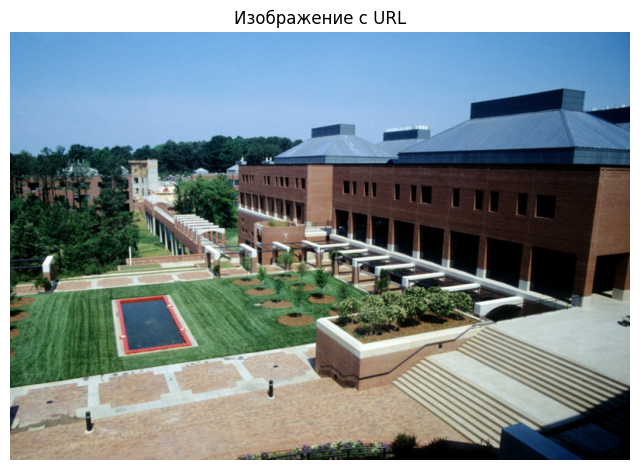

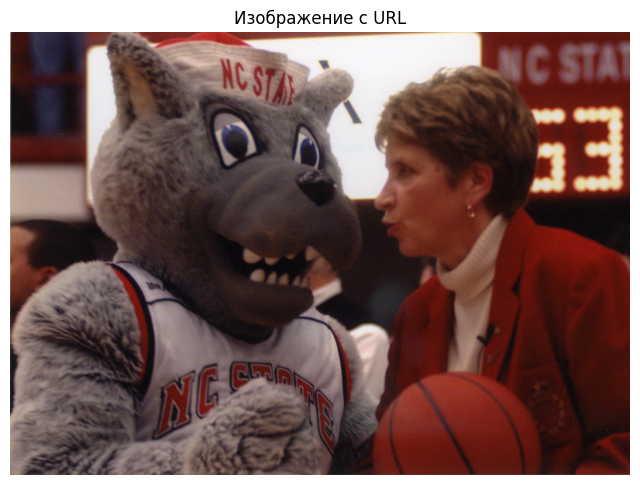

In [1]:
import requests
import matplotlib.pyplot as plt
from skimage import io
from io import BytesIO
import urllib3

# Отключаем предупреждения о небезопасном запросе
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Список URL-адресов изображений
urls = [
    "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
    "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
]

for url in urls:
    # Загружаем данные с отключенной проверкой сертификатов
    response = requests.get(url, verify=False)
    response.raise_for_status()  # проверяем успешность запроса
    
    # Читаем изображение из байтового потока
    image = io.imread(BytesIO(response.content))
    
    # Отображаем изображение с помощью matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title("Изображение с URL")
    plt.axis("off")
    plt.show()

#### ЗАДАНИЕ #1: СЧИТАЙТЕ ИЗОБРАЖЕНИЕ С ВЕБ-САЙТА, КОТОРЫЙ ВАМ НРАВИТСЯ, И ОТОБРАЗИТЕ ЕГО
[PlaceKitten](https://placekitten.com/)

[LibraryCollections](https://d.lib.ncsu.edu/collections/catalog?f%5Btopic_facet%5D%5B%5D=Campus+and+Town)



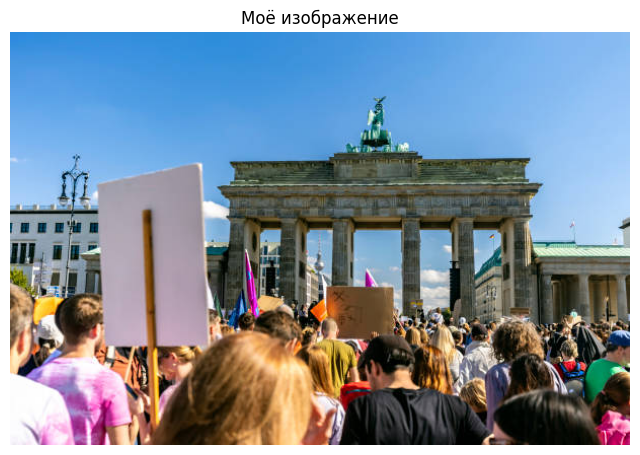

In [2]:
## TODO: LOAD IMAGE
## url =
## myImg = io.imread(url)
## cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))

# Отключаем предупреждения об отключённой проверке SSL-сертификатов
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# URL изображения
url = "https://media.istockphoto.com/id/1904465273/ru/фото/demonstration-in-berlin.jpg?s=612x612&w=0&k=20&c=lHAVii8Y23qs_UNR9t5vZwxWfscu9C249cFOHELwaIk="

# Загружаем изображение с отключённой проверкой сертификатов
response = requests.get(url, verify=False)
response.raise_for_status()  # проверка успешности запроса

# Читаем изображение из байтового потока
myImg = io.imread(BytesIO(response.content))

# Если изображение загружено в формате BGR, можно выполнить преобразование в RGB:
# import cv2
# myImg = cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB)

# Отображаем изображение с помощью matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(myImg)
plt.title("Моё изображение")
plt.axis("off")
plt.show()

##Шаг 3: Контуры изображения и гистограммы

In [3]:
print("=== image ===")
print("Тип данных:", image.dtype)
print("Высота:", image.shape[0])
print("Ширина:", image.shape[1])
if len(image.shape) == 3:
    print("Количество каналов:", image.shape[2])
else:
    print("Одноканальное изображение")

print("\n=== myImg ===")
print("Тип данных:", myImg.dtype)
print("Высота:", myImg.shape[0])
print("Ширина:", myImg.shape[1])
if len(myImg.shape) == 3:
    print("Количество каналов:", myImg.shape[2])
else:
    print("Одноканальное изображение")

=== image ===
Тип данных: uint8
Высота: 571
Ширина: 800
Количество каналов: 3

=== myImg ===
Тип данных: uint8
Высота: 408
Ширина: 612
Количество каналов: 3


### Сгенерируйте гистограмму цветного изображения и изображения в оттенках серого
Иногда требуется усилить контрастность изображения или увеличить контрастность в определенной области, пожертвовав при этом детализацией цветов, которые не сильно различаются или не имеют значения. Хорошим инструментом для поиска интересных областей является гистограмма. Чтобы создать гистограмму наших графических данных, мы используем функцию host() в matplot pylab
Подробнее: [Гистограммы](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Отобразите гистограмму всех пикселей цветного изображения

Text(0.5, 1.0, 'Гистограмма всех пикселей (myImg)')

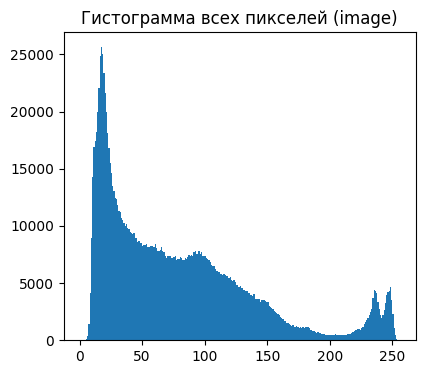

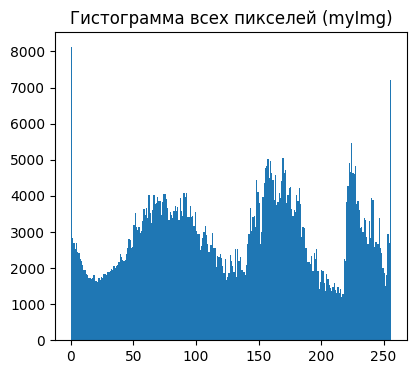

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.title("Гистограмма всех пикселей (image)")

# Гистограмма для "myImg"
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(myImg.ravel(), bins=256, range=[0,256])
plt.title("Гистограмма всех пикселей (myImg)")

Отобразите гистограмму канала R, G, B
Мы могли заметить, что зеленый канал имеет количество пикселей в 255, что соответствует белому пятну на изображении

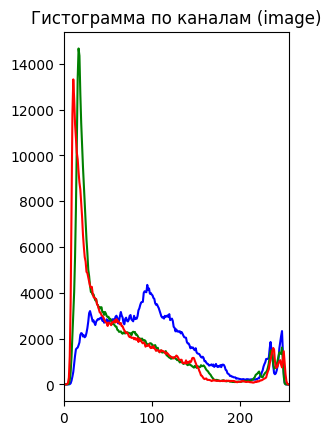

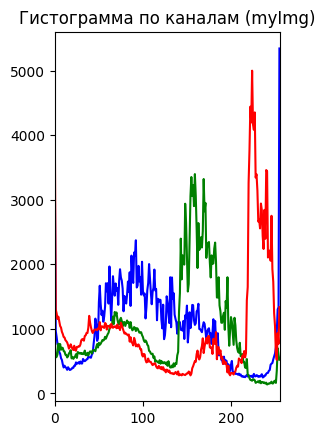

In [12]:
plt.subplot(1,2,2)
colors = ('b','g','r')
for i, col in enumerate(colors):
    hist = cv.calcHist([image], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.title("Гистограмма по каналам (image)")
plt.show()

plt.subplot(1,2,2)
for i, col in enumerate(colors):
    hist = cv.calcHist([myImg], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.title("Гистограмма по каналам (myImg)")
plt.show()

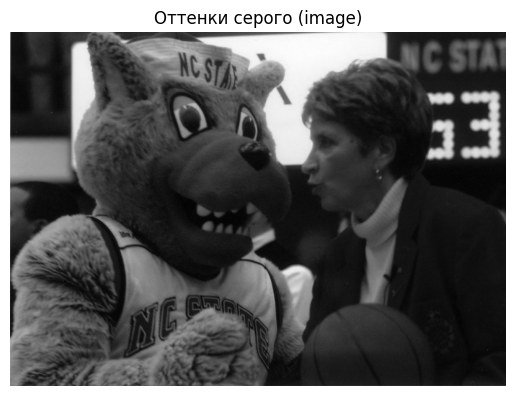

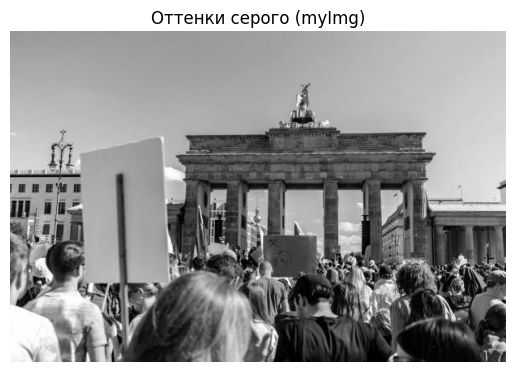

In [16]:
# Преобразование "image" в оттенки серого
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_image, cmap="gray")
plt.title("Оттенки серого (image)")
plt.axis("off")
plt.show()

myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(myGrayImg, cmap="gray")
plt.title("Оттенки серого (myImg)")
plt.axis("off")
plt.show()

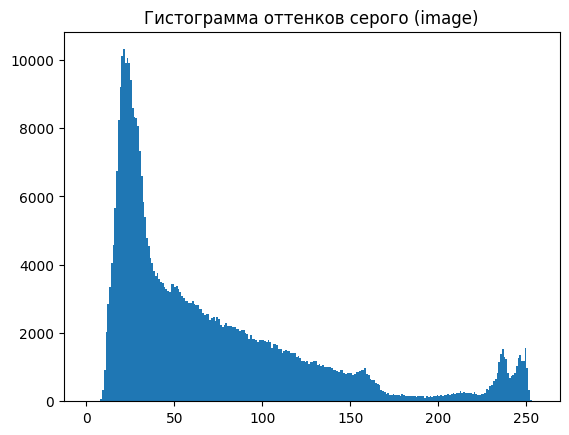

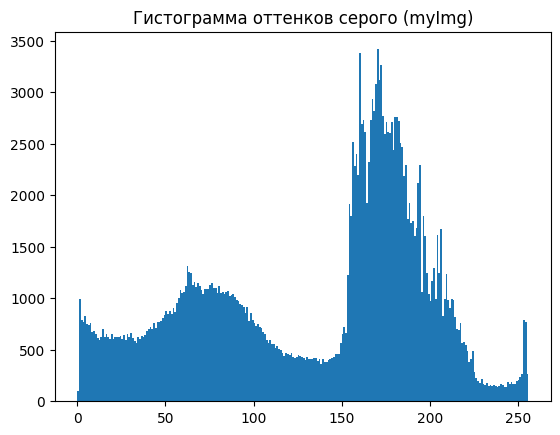

In [17]:
# Plot the histogram of the gray image. We could observe that the frequency of the image hist has decreased ~ 1/3 of the histogram of color image
plt.figure()
plt.hist(gray_image.ravel(), bins=256, range=[0,256])
plt.title("Гистограмма оттенков серого (image)")
plt.show()

plt.figure()
plt.hist(myGrayImg.ravel(), bins=256, range=[0,256])
plt.title("Гистограмма оттенков серого (myImg)")
plt.show()

 #### ЗАДАНИЕ # 2: Отобразите оттенки серого вашего цветного изображения и сгенерируйте гистограмму


In [ ]:
#myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
#cv2_imshow()

### Найдите контур изображения в оттенках серого

Способ 1: Использовать matplotlib. contour

Подрoбнее: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

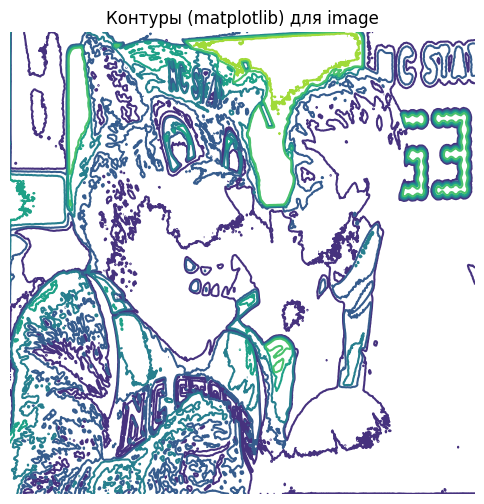

In [34]:
# plt.contour(gray_image, origin = "image")

plt.figure(figsize=(6,6))
plt.contour(gray_image, origin="image")
plt.title("Контуры (matplotlib) для image")
plt.axis("off")
plt.show()

Способ 2: Используйте библиотеку OpenCV

Побробнее: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

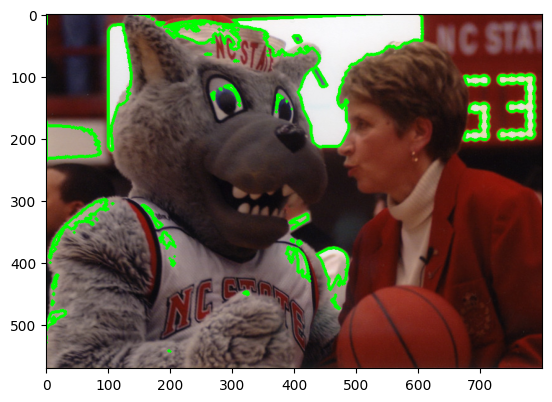

In [35]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)


#### ЗАДАНИЕ # 3: Найдите контур вашего собственного изображения

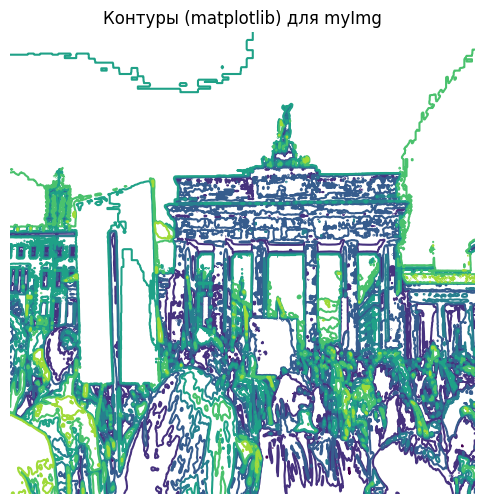

In [36]:
# Способ 1: matplotlib.contour для "myImg"
plt.figure(figsize=(6,6))
plt.contour(myGrayImg, origin="image")
plt.title("Контуры (matplotlib) для myImg")
plt.axis("off")
plt.show()

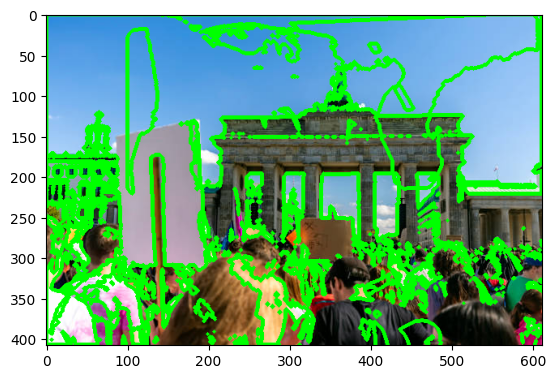

In [37]:
my_ret, my_thresh = cv.threshold(myGrayImg, 150, 255, 0)
my_contours, my_hierarchy = cv.findContours(my_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(myImg, my_contours, -1, (0, 255, 0), 3)
plt.imshow(myImg)


##Шаг 4: Преобразование в оттенках серого и выравнивание гистограммы


### Преобразование в оттенках серого
В этом разделе приведены некоторые примеры выполнения математических преобразований изображения в оттенках серого

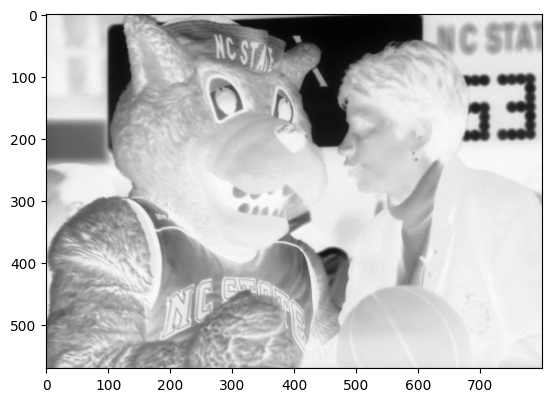

In [40]:
# This is an inverse operation of the grayscale image, you could see that the bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
plt.imshow(im2, cmap='gray')

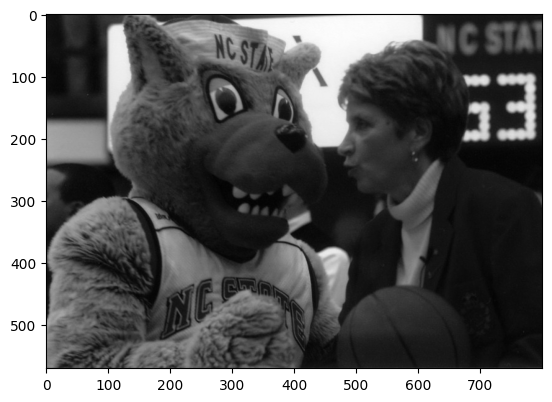

In [42]:
# Another transform of the image, after adding a constant,
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
plt.imshow(im3, cmap='gray')

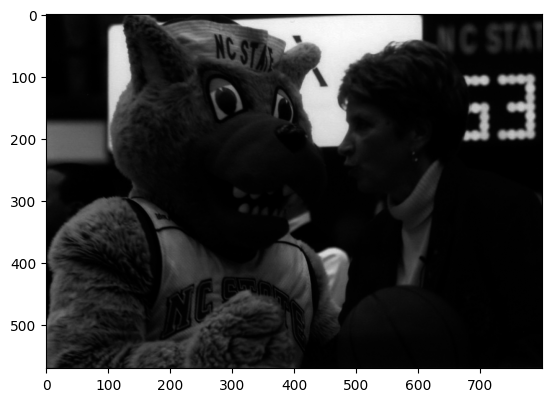

In [43]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
plt.imshow(im4, cmap='gray')

#### ЗАДАНИЕ #4:  Попробуйте выполнить несколько математических операций с вашим изображением


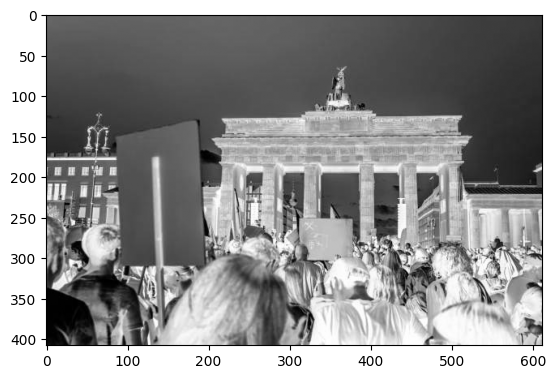

In [44]:
## Implement your code here
## myGrayImgTrans = myGrayImg...
## cv2_imshow(myGrayImgTrans)

invMyGrayImg = 255 - myGrayImg
plt.imshow(invMyGrayImg, cmap='gray')

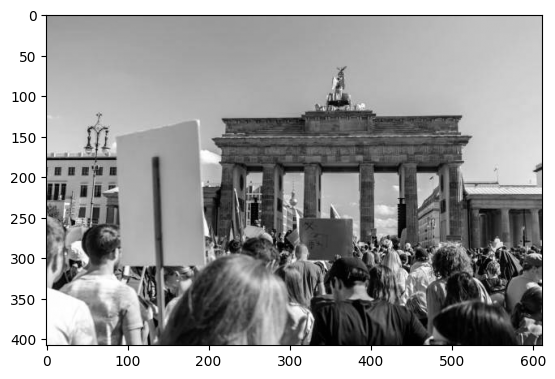

In [45]:
# Затуманивание изображение 
constMyGrayImg = (100.0/255)*myGrayImg + 200
plt.imshow(constMyGrayImg, cmap='gray')

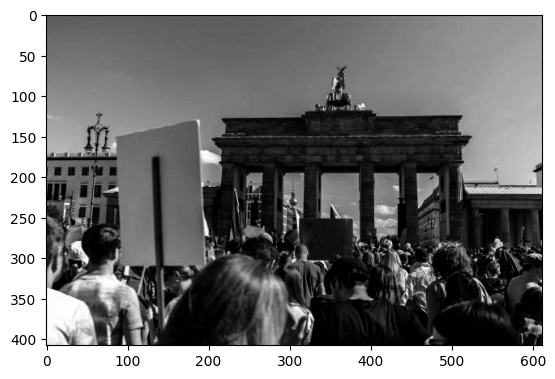

In [50]:
# Уменьшение яркости изображения
lowBrightMyGrayImg = 255.0*(myGrayImg/255.0)**2
plt.imshow(lowBrightMyGrayImg, cmap='gray')

### Выравнивание гистограммы
В этом разделе демонстрируется выравнивание гистограммы на темном изображении. Это преобразование выравнивает гистограмму на уровне серого, чтобы все значения интенсивности были как можно более одинаковыми. Функция преобразования представляет собой функцию кумулятивного распределения (cdf) значений пикселей на изображении (нормализованную для сопоставления диапазона значений пикселей с требуемым диапазоном). В качестве примера используйте изображение 4.

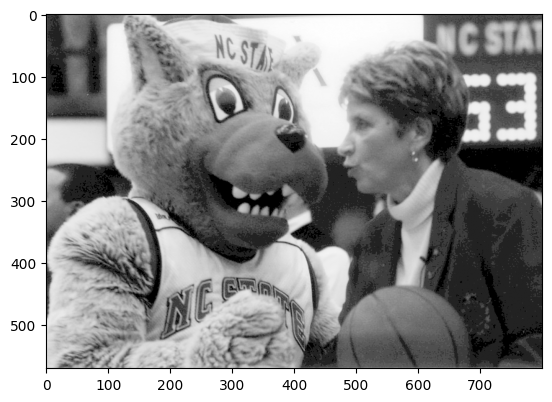

In [51]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
plt.imshow(im5, cmap='gray')

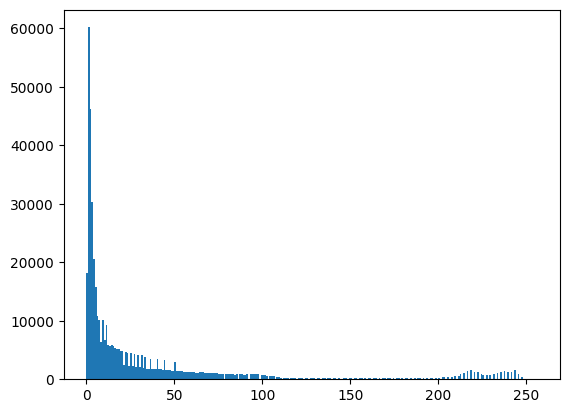

In [52]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

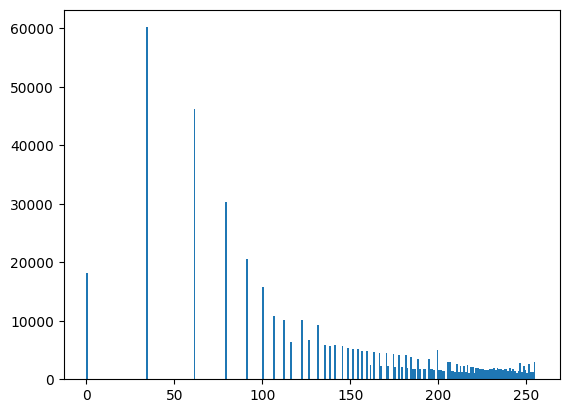

In [53]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

#### ЗАДАНИЕ # 5: Выполните выравнивание гистограммы на вашем изображении в оттенках серого



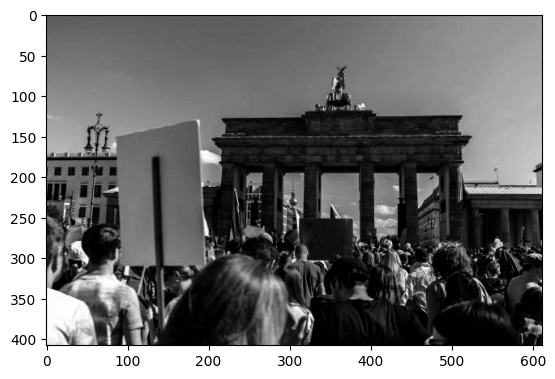

In [54]:
## TODO: IMPLEMENT YOUR CODE HERE
## CODE INSTRUCTION
##plt.imshow()

histeq_img = histeq(myGrayImg)

plt.imshow(lowBrightMyGrayImg, cmap='gray')

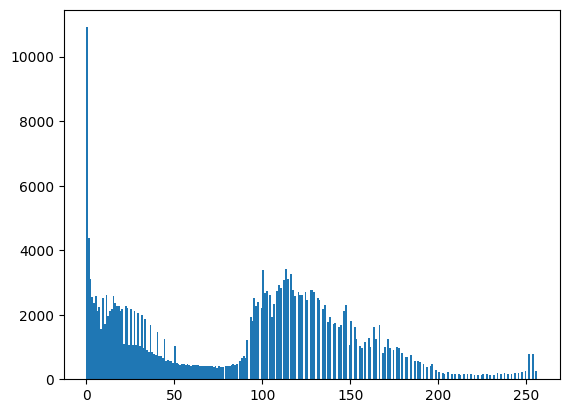

In [55]:
plt.hist(lowBrightMyGrayImg.ravel(),bins = 256, range = [0, 256])
plt.show()

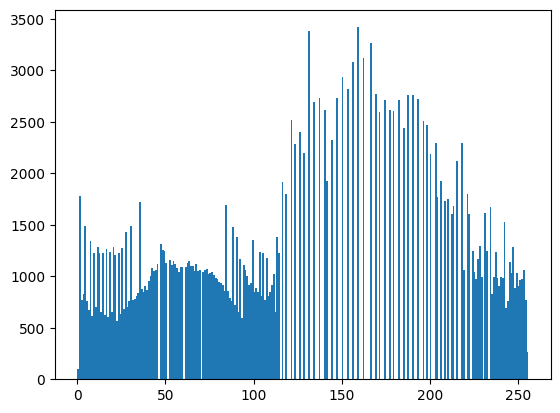

In [56]:
plt.hist(histeq_img.ravel(),bins = 256, range = [0, 256])
plt.show()

##Шаг 5: Преобразование Фурье серых изображений
[FFT](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
> Преобразование Фурье предназначено для определения частотной области изображения. Вы можете рассматривать изображение как сигнал, который дискретизируется в двух направлениях. Таким образом, преобразование Фурье как по оси X, так и по оси Y дает частотное представление изображения. Для синусоидального сигнала, если амплитуда изменяется очень быстро за короткое время, можно сказать, что это высокочастотный сигнал. Если амплитуда изменяется медленно, это низкочастотный сигнал. Контуры и шумы являются высокочастотным компонентом изображения, поскольку они резко меняются на изображениях.

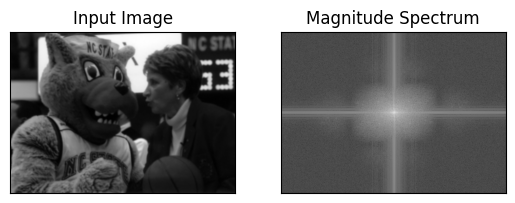

In [57]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### ЗАДАНИЕ # 6: Создайте преобразование Фурье для вашего изображения в оттенках серого

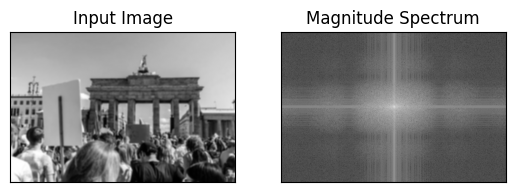

In [58]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
myImBlur = cv.blur(myGrayImg,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(myImBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(myImBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


## Шаг 6: Поиск ребер с помощью фильтрации частот преобразованием Фурье

В этом разделе выполняется фильтрация верхних частот для удаления низкочастотной составляющей, в результате чего изображение становится более четким и содержит контуры

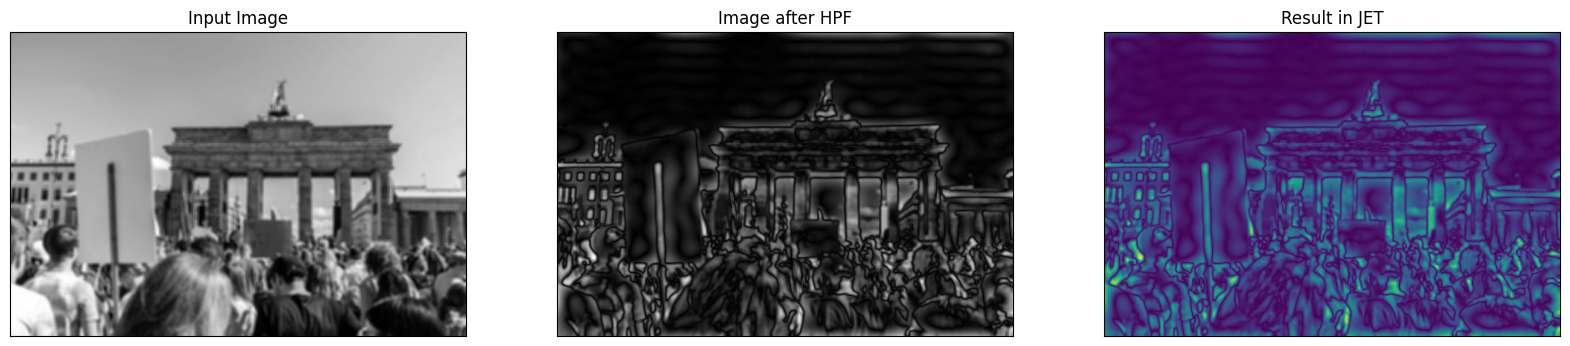

In [59]:
rows, cols = myImBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(myImBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

### Загружаем изображения


In [63]:
img_1 = io.imread('./data/img_1.jpg')
img_2 = io.imread('./data/img_2.jpg')

(<Axes: >, <matplotlib.image.AxesImage at 0x15ebded50>)

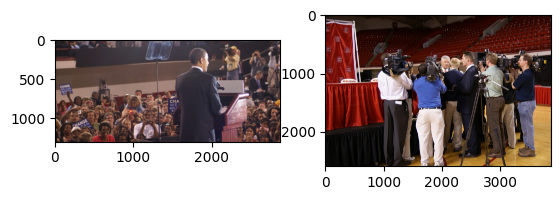

In [64]:
plt.subplot(121),plt.imshow(img_1)
plt.subplot(122),plt.imshow(img_2)

In [65]:
from prettytable import PrettyTable

myTable = PrettyTable(["image", "data type", "height", "width", "channels"]) 
myTable.add_row(["img_1.jpg", img_1.dtype, img_1.shape[0], img_1.shape[1], img_1.shape[2]])
myTable.add_row(["img_2.jpg", img_2.dtype, img_2.shape[0], img_2.shape[1], img_2.shape[2]])
myTable

+-----------+-----------+--------+-------+----------+
|   image   | data type | height | width | channels |
+-----------+-----------+--------+-------+----------+
| img_1.jpg |   uint8   |  1296  |  2875 |    3     |
| img_2.jpg |   uint8   |  2592  |  3872 |    3     |
+-----------+-----------+--------+-------+----------+

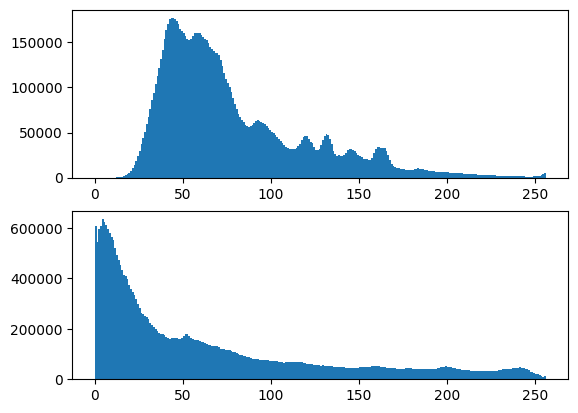

In [66]:
plt.subplot(2, 1, 1)
plt.hist(img_1.ravel(),bins = 256, range = [0,256])

plt.subplot(2, 1, 2)
plt.hist(img_2.ravel(),bins = 256, range = [0,256])
plt.show()

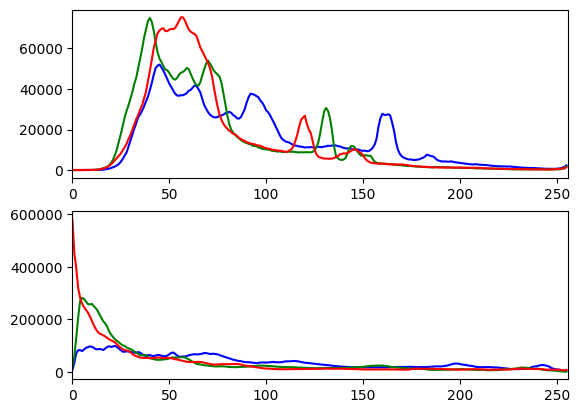

In [67]:
plt.subplot(2, 1, 1)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img_1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.subplot(2, 1, 2)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img_2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Отобразите оттенки серого вашего цветного изображения и сгенерируйте гистограмму

(<Axes: >, <matplotlib.image.AxesImage at 0x15f311d10>)

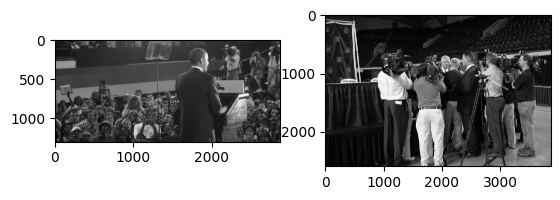

In [68]:
img_1_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(img_1_gray, cmap='gray')
img_2_gray = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
plt.subplot(122),plt.imshow(img_2_gray, cmap='gray')

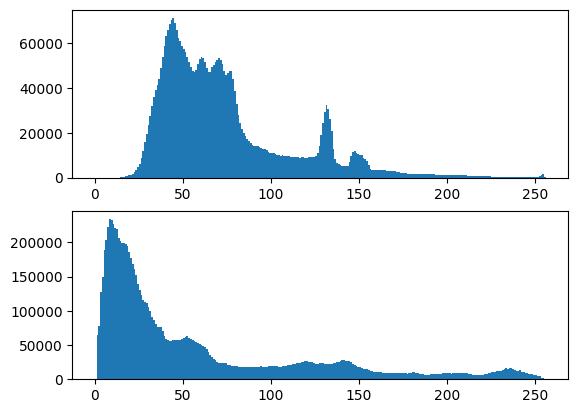

In [69]:
plt.subplot(211)
plt.hist(img_1_gray.ravel(),bins = 256, range = [0, 256])
plt.subplot(212)
plt.hist(img_2_gray.ravel(),bins = 256, range = [0, 256])
plt.show()

### Найдите контур вашего собственного изображения

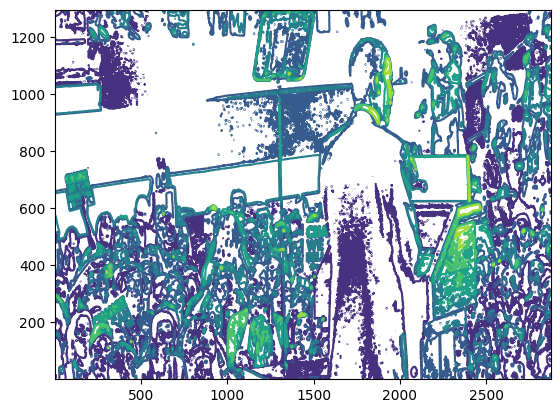

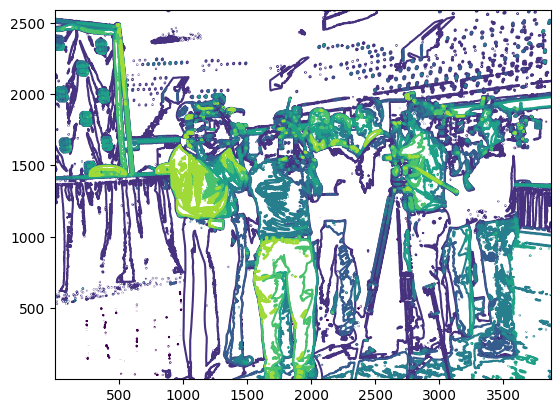

In [70]:
plt.contour(img_1_gray, origin = "image")
plt.show()
plt.contour(img_2_gray, origin = "image")
plt.show()

### Попробуйте выполнить несколько математических операций с вашим изображением

(<Axes: >, <matplotlib.image.AxesImage at 0x16a8c3b10>)

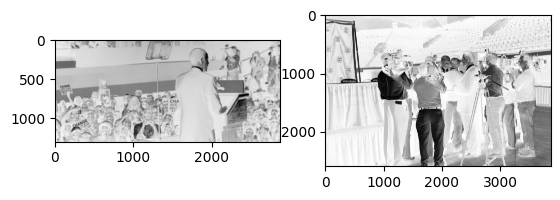

In [71]:
img_1_2 = 255 - img_1_gray
img_2_2 = 255 - img_2_gray

plt.subplot(121),plt.imshow(img_1_2, cmap='gray')
plt.subplot(122),plt.imshow(img_2_2, cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x16a78b110>)

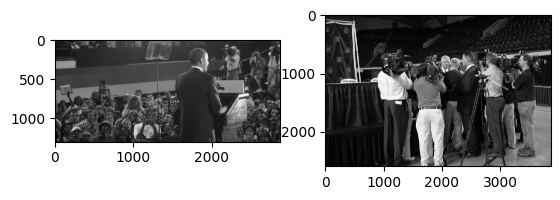

In [72]:
img_1_3 = (100.0/255)*img_1_gray + 200
img_2_3 = (100.0/255)*img_2_gray + 200

plt.subplot(121),plt.imshow(img_1_3, cmap='gray')
plt.subplot(122),plt.imshow(img_2_3, cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x174191a90>)

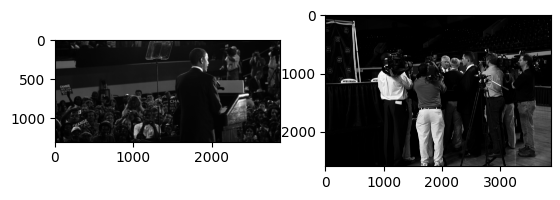

In [76]:
img_1_4 = 255.0*(img_1_gray/255.0)**2
img_2_4 = 255.0*(img_2_gray/255.0)**2

plt.subplot(121),plt.imshow(img_1_4, cmap='gray')
plt.subplot(122),plt.imshow(img_2_4, cmap='gray')

### Выполните выравнивание гистограммы на вашем изображении в оттенках серого

(<Axes: >, <matplotlib.image.AxesImage at 0x1741dfd90>)

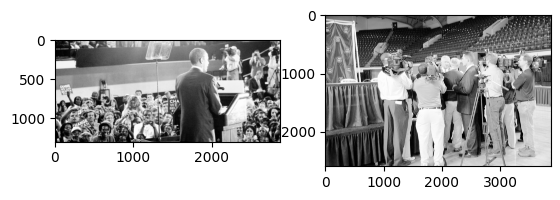

In [77]:
histeq_img_1 = histeq(img_1_gray)
histeq_img_2 = histeq(img_2_gray)

plt.subplot(121),plt.imshow(histeq_img_1, cmap='gray')
plt.subplot(122),plt.imshow(histeq_img_2, cmap='gray')

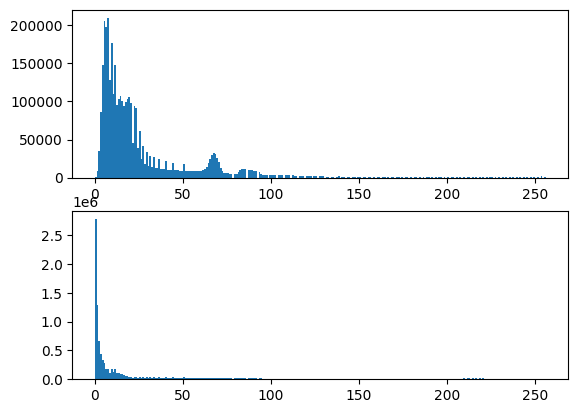

In [78]:
plt.subplot(211),plt.hist(img_1_4.ravel(),bins = 256, range = [0, 256])
plt.subplot(212),plt.hist(img_2_4.ravel(),bins = 256, range = [0, 256])
plt.show()

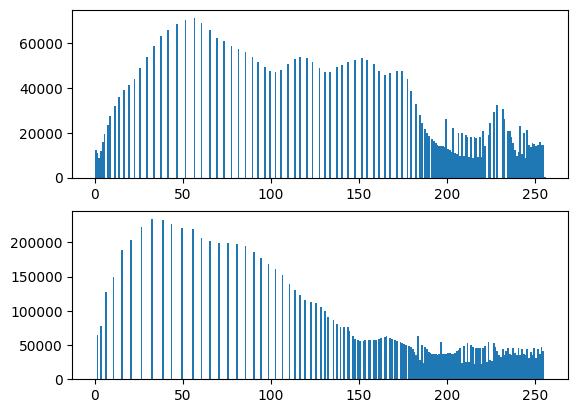

In [80]:
plt.subplot(211),plt.hist(histeq_img_1.ravel(),bins = 256, range = [0, 256])
plt.subplot(212),plt.hist(histeq_img_2.ravel(),bins = 256, range = [0, 256])
plt.show()

### Создайте преобразование Фурье для вашего изображения в оттенках серого

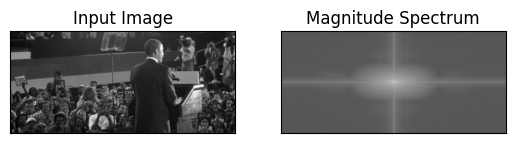

In [81]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
img_1_blur = cv.blur(img_1_gray,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(img_1_blur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img_1_blur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

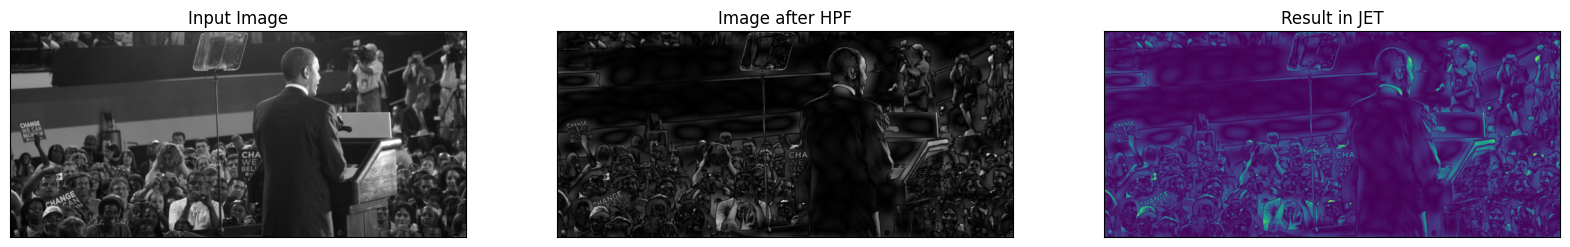

In [82]:
rows, cols = img_1_blur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(img_1_blur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

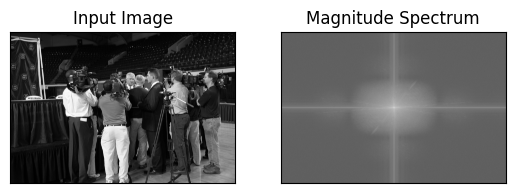

In [83]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
img_2_blur = cv.blur(img_2_gray,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(img_2_blur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img_2_blur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

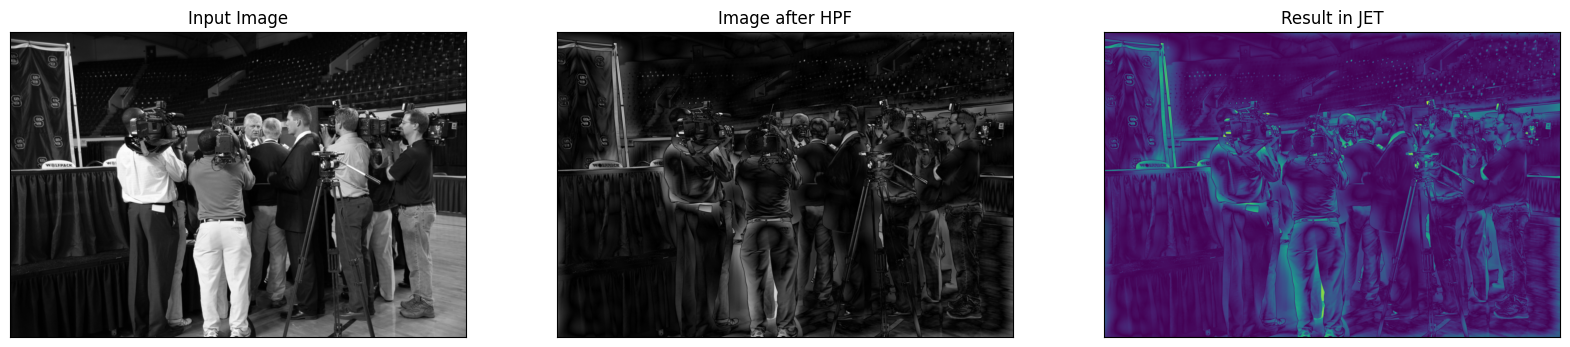

In [84]:
rows, cols = img_2_blur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(img_2_blur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()